In [0]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LassoCV
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [5]:
from google.colab import files
uploads=files.upload()

Saving train_data.csv to train_data.csv


In [0]:
data=pd.read_csv('train_data.csv')
#data


In [0]:
nominal=['Street','Alley','LandContour','LotConfig','Neighborhood','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','Foundation','Heating','CentralAir','GarageType','PavedDrive','MiscFeature','SaleType']
ordinal=['MSZoning','LotShape','Utilities','LandSlope','Condition1','Condition2','BldgType','HouseStyle','MasVnrType','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','Electrical','KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','SaleCondition']
numerical=['GrLivArea']
target=['SalePrice']

In [0]:
#checking for null values
data.isnull()

In [0]:
#replacing the null values using na_values
data.replace({"NA": np. nan},inplace=True)
data

In [0]:
#replacing missing values with the values before or after them
new_data=data.fillna(axis=0, method='ffill').fillna(axis=0, method='bfill')
#new_data.info()
new_data

In [0]:
#combining the categorical data from my dataset
categorical_data=new_data.select_dtypes(include=['object']).copy()
column_names=list(categorical_data.columns)
#column_names
#changing the data type of my categorical data to be able
#to use pandas for one hot encoding
for feature in column_names:
  categorical_data[feature]=categorical_data[feature].astype('category')
#one hot encoding
for feature in ordinal:
  categorical_data[feature]=categorical_data[feature].cat.codes

categorical_data.head()

In [0]:
#one hot coding nominal data
data_copy=categorical_data.copy()

data_copy = pd.concat([pd.get_dummies(data_copy[nominal]),data_copy],axis=1) 
data_copy.drop(nominal,axis=1,inplace=True)
#returning the removed columns
freshnew_data = pd.concat([data_copy,new_data[numerical],new_data[target]],axis=1)
freshnew_data

In [0]:
X=freshnew_data.drop("SalePrice",1)
data_array=X.to_numpy()
#data_array

In [0]:
truncSVD=TruncatedSVD(n_components=2)
data_app=truncSVD.fit_transform(data_array)

In [15]:
truncSVD.singular_values_

array([61288.18757136,   196.95856115])

In [0]:
#new data for training
newtrain_data=pd.DataFrame(data_app,columns=['latent_1','latent_2'])
newtrain_data
final_data=pd.concat([newtrain_data,freshnew_data[target]],axis=1)
final_data

In [17]:
all_features=list(freshnew_data.columns)
#all_features
X=freshnew_data.loc[:,all_features].values
y=final_data.loc[:,["SalePrice"]].values
X

array([[     0,      1,      1, ...,      4,   1710, 208500],
       [     0,      1,      1, ...,      4,   1262, 181500],
       [     0,      1,      1, ...,      4,   1786, 223500],
       ...,
       [     0,      1,      0, ...,      4,   2340, 266500],
       [     0,      1,      0, ...,      4,   1078, 142125],
       [     0,      1,      0, ...,      4,   1256, 147500]])

In [18]:
#standardizing x
X=StandardScaler().fit_transform(X)
X

array([[-0.06423821,  0.06423821,  0.92092414, ...,  0.2085023 ,
         0.37033344,  0.34727322],
       [-0.06423821,  0.06423821,  0.92092414, ...,  0.2085023 ,
        -0.48251191,  0.00728832],
       [-0.06423821,  0.06423821,  0.92092414, ...,  0.2085023 ,
         0.51501256,  0.53615372],
       ...,
       [-0.06423821,  0.06423821, -1.08586577, ...,  0.2085023 ,
         1.56964722,  1.07761115],
       [-0.06423821,  0.06423821, -1.08586577, ...,  0.2085023 ,
        -0.83278768, -0.48852299],
       [-0.06423821,  0.06423821, -1.08586577, ...,  0.2085023 ,
        -0.49393395, -0.42084081]])

In [0]:
#pca
pca=PCA(n_components=2)
princ_components=pca.fit_transform(np.nan_to_num(X))

In [25]:
#converting the array back to a data frame
pca_data=pd.DataFrame(princ_components,columns=['PC1','PC2'])
final_dataset=pd.concat([pca_data,freshnew_data[target]],axis=1)
final_dataset

,PC1,PC2,SalePrice
0,-2.623797,0.325129,208500
1,0.360157,-1.922953,181500
2,-2.986454,0.166642,223500
3,2.502312,0.891900,140000
4,-3.653964,-0.153770,250000
...,...,...,...
1455,-2.010854,0.632536,175000
1456,1.145640,-3.141035,210000
1457,-1.587724,1.685469,266500
1458,1.789913,-1.237883,142125


In [0]:
#creating new data set array
final_dataset_array=final_dataset.to_numpy()
#final_dataset_array

In [29]:
pca.explained_variance_ratio_

array([0.6233868, 0.3766132])

In [0]:
min_val=np.min(final_dataset_array,axis=0)
max_val=np.max(final_dataset_array,axis=0)
X,Y=np.meshgrid(np.linspace(min_val[0],max_val[0],20),np.linspace(min_val[1],max_val[1],20))

In [0]:
regressor=LassoCV()
#X=final_dataset.drop('SalePrice',1)
#y=final_dataset['SalePrice']
training_final=np.c_[final_dataset_array[:,0],final_dataset_array[:,1]]
#regressor.fit(X,y)
regressor.fit(training_final,final_dataset_array[:,2])
weight_1=regressor.coef_[0]
weight_2=regressor.coef_[1]
b=regressor.intercept_
#the general linear regression equation
Z=weight_1*X + weight_2*Y + b


Text(0.5, 0.92, 'Plane/Line of best fit')

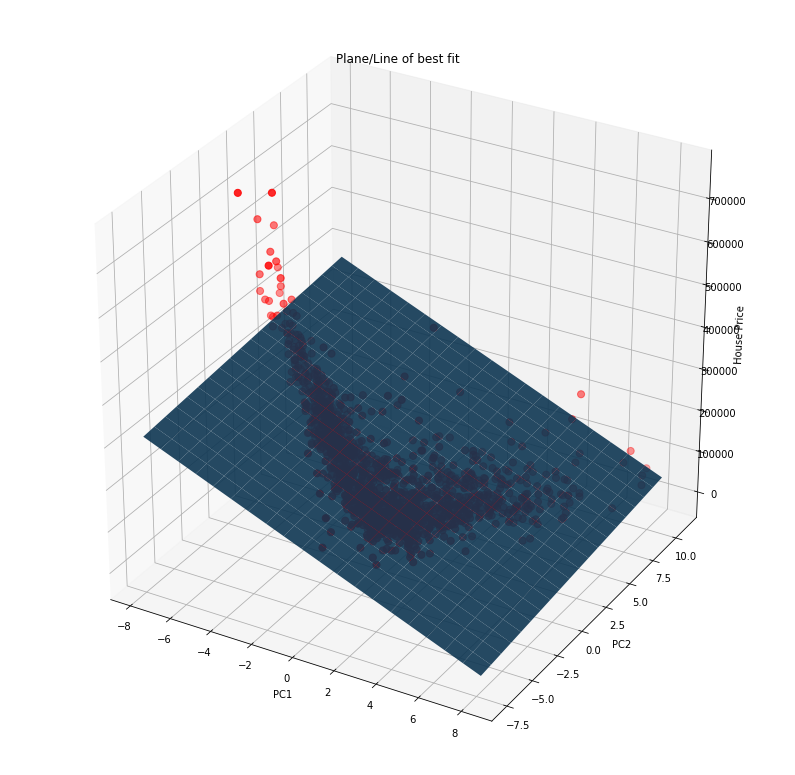

In [41]:
#plotting the data
figure1=plt.figure(figsize=(14,14))
ax=figure1.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.9)
ax.scatter(final_dataset_array[:,0],final_dataset_array[:,1],final_dataset_array[:,2], c='r', s=50)
plt.xlabel('PC1')
plt.ylabel('PC2')
ax.set_zlabel('House Price')
ax.set_title('Plane/Line of best fit')
